# Import the Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the Training Data

In [2]:
data_train = pd.read_csv('train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing

### Variables of Interest

In [3]:
data_train = data_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Checking for Missing Values

In [4]:
data_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### Dealing with Missing Values

In [5]:
# Either Remove the Missing values or 
# Replace them with Descriptive Statistics (mean, median, mode)

# data_train = data_train.dropna(axis=0)
# data_train.isnull().sum()

data_train['Age'].fillna(data_train['Age'].mean(), inplace=True)
data_train['Embarked'].fillna(data_train['Embarked'].mode()[0], inplace=True)

In [6]:
data_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Descriptive Statistics

In [7]:
data_train.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,13.002015,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,29.699118,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN


### Survival Count/s

In [8]:
data_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

##### Plotting Survival Rate w.r.t. Desired Variables

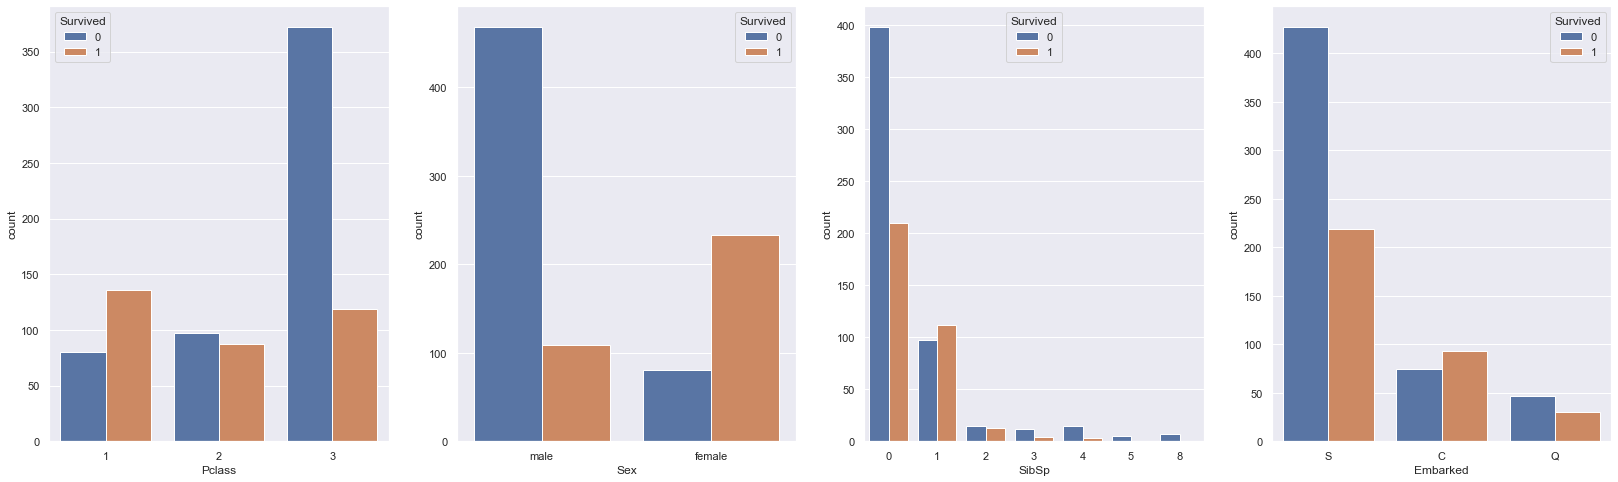

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(28, 8))

# Survived vs Pclass
sns.countplot(data=data_train, x="Pclass", hue="Survived", ax=ax[0])

# Survived vs Sex
sns.countplot(data=data_train, x="Sex", hue="Survived", ax=ax[1])

# Survived vs SibSp
sns.countplot(data=data_train, x="SibSp", hue="Survived", ax=ax[2])

# Survived vs Embarked
sns.countplot(data=data_train, x="Embarked", hue="Survived", ax=ax[3])

# fig.subplots_adjust(wspace=0.5)
plt.show()

### Dealing with Categorical Data 

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder = LabelEncoder()
data_train['Sex'] = label_encoder.fit_transform(data_train['Sex'])
data_train['Embarked'] = label_encoder.fit_transform(data_train['Embarked'])

data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Standardization

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
standardize_features = ['Age', 'Fare']

Scaler = StandardScaler()
data_train[standardize_features] = Scaler.fit_transform(data_train[standardize_features])

data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.592481,1,0,-0.502445,2
1,1,1,0,0.638789,1,0,0.786845,0
2,1,3,0,-0.284663,0,0,-0.488854,2
3,1,1,0,0.407926,1,0,0.420730,2
4,0,3,1,0.407926,0,0,-0.486337,2


# Training the Dataset

In [14]:
from sklearn.model_selection import train_test_split

### Define inputs and targets 

In [15]:
target = data_train['Survived']
inputs = data_train.drop(['Survived'], axis=1)

# Training
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, shuffle=True, random_state=42)

# Optimisation Algorithm (Stratified K-Folds Cross-Validator)

In [16]:
from sklearn.model_selection import StratifiedKFold

In [17]:
# Shuffle each classes' samples before splitting into batches
cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Max. no. of iterations taken for the solvers to converge
max_iter = [20, 100, 200, 500, 1000, 5000, 10000]

# Algo. to use in the optimization problem
solver = ['newton-cg', 'lbfgs', 'liblinear']

# Inverse of regularization strength
C_range = np.logspace(-4, 5, 14)

# The "balanced" mode uses the values of 'y' to automatically adjust Weights inversely proportional to
# class frequencies in the input data
class_weight = ['balanced']

# Dict. of HyperParameters
param_grid = dict(max_iter=max_iter, solver=solver, C=C_range, class_weight=class_weight)

# Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [19]:
model = LogisticRegression()

# Exhaustice search over HyperParameters(param_grid) values for an estimator
grid = GridSearchCV(model, param_grid=param_grid, cv=cv)

# Fit the training data (X_train and y_train)
grid.fit(X=X_train, y=y_train)
print('The best parameters are %s with a score of %0.2f' % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.28942661247167517, 'class_weight': 'balanced', 'max_iter': 20, 'solver': 'liblinear'} with a score of 0.79


### Modelling with the Best Parameter

In [20]:
model = LogisticRegression(max_iter=20, solver='liblinear', C=0.289, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(C=0.289, class_weight='balanced', max_iter=20,
                   solver='liblinear')

##### Accuracy of the training dataset

In [21]:
from sklearn.metrics import accuracy_score

y_hat_Training = model.predict(X_train)
Prediction = model.predict(X_test)

print('Accuracy of the training is: ', "{:.2f}".format(accuracy_score(y_train, y_hat_Training)*100))
print('Accuracy of the testing is: ', "{:.2f}".format(accuracy_score(y_test, Prediction)*100))

Accuracy of the training is:  78.65
Accuracy of the testing is:  78.77


##### Precision, Recall, F-Score, Support 

In [22]:
from sklearn.metrics import precision_recall_fscore_support as PRFS

In [23]:
precision, recall, fscore, support = PRFS(y_true=y_test, y_pred=Prediction)

print('Precision is: {}'.format(precision),
     '\nRecall is: {}'.format(recall),
     '\nF-Score is: {}'.format(fscore),
     '\nSupport is: {}'. format(support))

Precision is: [0.81904762 0.74324324] 
Recall is: [0.81904762 0.74324324] 
F-Score is: [0.81904762 0.74324324] 
Support is: [105  74]


# Testing the Data

In [24]:
data_test = pd.read_csv('test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Preprocessing the Testing Dataset

### Variables of Interest

In [25]:
data_test = data_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### Checking for Missing Values

In [26]:
data_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

### Dealing with Missing Values

In [27]:
# Either Remove the Missing values or 
# Replace them with Descriptive Statistics (mean, median, mode)

# data_test = data_test.dropna(axis=0)
# data_test.isnull().sum()

data_test['Age'].fillna(data_test['Age'].mean(), inplace=True)
data_test['Fare'].fillna(data_test['Fare'].mean(), inplace=True)

In [28]:
data_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Dealing with Categorical Data

In [29]:
data_test['Sex'] = label_encoder.fit_transform(data_test['Sex'])
data_test['Embarked'] = label_encoder.fit_transform(data_test['Embarked'])

data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


# Prediction on the Testing Data

In [30]:
prediction = model.predict(data_test)

columns = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
Prediction_dataframe = pd.DataFrame(columns=columns)

Prediction_dataframe['Pclass'] = pd.read_csv('test.csv')['Pclass']
Prediction_dataframe['Sex'] = pd.read_csv('test.csv')['Sex']
Prediction_dataframe['Age'] = pd.read_csv('test.csv')['Age']
Prediction_dataframe['Fare'] = pd.read_csv('test.csv')['Fare']
Prediction_dataframe['Embarked'] = pd.read_csv('test.csv')['Embarked']

In [31]:
Prediction_dataframe['Survival_Prediction'] = pd.DataFrame(data=prediction)
Prediction_dataframe

,Pclass,Sex,Age,Fare,Embarked,Survival_Prediction
0,3,male,34.5,7.8292,Q,0
1,3,female,47.0,7.0000,S,0
2,2,male,62.0,9.6875,Q,0
3,3,male,27.0,8.6625,S,0
4,3,female,22.0,12.2875,S,0
...,...,...,...,...,...,...
413,3,male,NaN,8.0500,S,0
414,1,female,39.0,108.9000,C,1
415,3,male,38.5,7.2500,S,0
416,3,male,NaN,8.0500,S,0
